In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from google.colab import data_table
data_table.enable_dataframe_formatter()

df = pd.read_csv('/content/weight-height.csv')
df.head()

Gender     Height      Weight
0   Male  73.847017  241.893563
1   Male  68.781904  162.310473
2   Male  74.110105  212.740856
3   Male  71.730978  220.042470
4   Male  69.881796  206.349801

<Axes: xlabel='Height', ylabel='Count'>

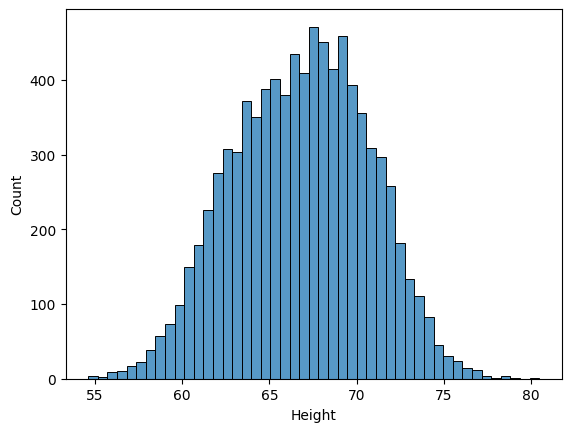

In [5]:
import seaborn as sns
sns.histplot(df['Height'])

<Axes: xlabel='Height', ylabel='Count'>

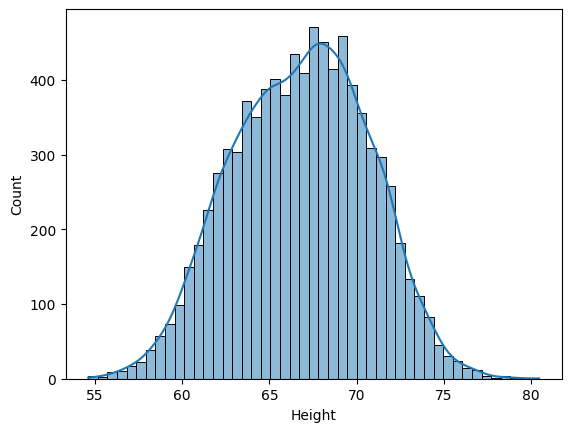

In [6]:
sns.histplot(df['Height'],kde=True)

<Axes: xlabel='Weight', ylabel='Count'>

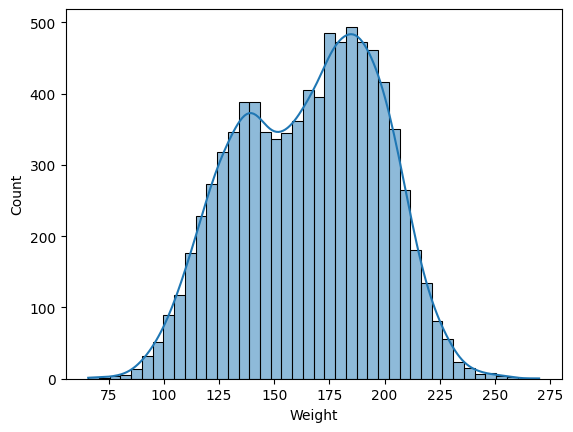

In [7]:
sns.histplot(df['Weight'],kde=True)

#Z-score

$z-score = (x-x(mean))/x(std)$

In [16]:
df['zscore']=(df['Height']-df['Height'].mean())/df['Height'].std()
df.tail()

Gender     Height      Weight    zscore
8550  Female  60.483946  110.565497 -1.642491
8551  Female  63.423372  129.921671 -0.879292
8552  Female  65.584057  155.942671 -0.318287
8553  Female  67.429971  151.678405  0.160990
8554  Female  60.921791  131.253738 -1.528808

In [10]:
df.zscore.min()

-3.1658344959558646

In [13]:
df.zscore.max()

3.5415386870680443

In [11]:
df.zscore.mean()

-7.973360915601358e-17

In [12]:
df.zscore.std()

0.9999999999999999

#Remove Outliers

In [26]:
df2 = df.copy()
max_z = df2.zscore.max()
min_z = df2.zscore.min()

removed_outliers =df[ (df2['zscore']<3) & (df2['zscore']>-3)]
removed_outliers

Gender     Height      Weight    zscore
0       Male  73.847017  241.893563  1.827126
1       Male  68.781904  162.310473  0.512009
2       Male  74.110105  212.740856  1.895435
3       Male  71.730978  220.042470  1.277713
4       Male  69.881796  206.349801  0.797587
...      ...        ...         ...       ...
8550  Female  60.483946  110.565497 -1.642491
8551  Female  63.423372  129.921671 -0.879292
8552  Female  65.584057  155.942671 -0.318287
8553  Female  67.429971  151.678405  0.160990
8554  Female  60.921791  131.253738 -1.528808

[8547 rows x 4 columns]

In [27]:
df.shape

(8555, 4)

In [28]:
removed_outliers.shape

(8547, 4)

In [30]:
df[df['zscore']>3]

Gender     Height      Weight    zscore
1317    Male  78.462053  227.342565  3.025384
2014    Male  78.998742  269.989698  3.164731
3285    Male  78.528210  253.889004  3.042561
3757    Male  78.621374  245.733783  3.066750
6328  Female  80.450000  178.020675  3.541539

In [31]:
df[df['zscore']<-3]

Gender     Height     Weight    zscore
6624  Female  54.616858  71.393749 -3.165834
7294  Female  54.873728  78.606670 -3.099140
7617  Female  55.148557  88.812412 -3.027783

#STD - standard deviation

In [32]:
df3 = df.copy()
mean = df3.Height.mean()
std = df3.Height.std()

sigma_3 = mean + (3*std)
sigma_3_neg = mean - (3*std)

sigma_3

78.36428842382125

In [33]:
sigma_3_neg

55.2555618343576

In [35]:
remove_outliers_by_sigma = df[(df['Height']<sigma_3) & (df['Height']>sigma_3_neg)]
remove_outliers_by_sigma

Gender     Height      Weight    zscore
0       Male  73.847017  241.893563  1.827126
1       Male  68.781904  162.310473  0.512009
2       Male  74.110105  212.740856  1.895435
3       Male  71.730978  220.042470  1.277713
4       Male  69.881796  206.349801  0.797587
...      ...        ...         ...       ...
8550  Female  60.483946  110.565497 -1.642491
8551  Female  63.423372  129.921671 -0.879292
8552  Female  65.584057  155.942671 -0.318287
8553  Female  67.429971  151.678405  0.160990
8554  Female  60.921791  131.253738 -1.528808

[8547 rows x 4 columns]

#box-plot

{'whiskers': [<matplotlib.lines.Line2D at 0x7fee28845600>,
 'caps': [<matplotlib.lines.Line2D at 0x7fee28845630>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fee288460b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fee288448b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fee288473a0>],
 'means': []}

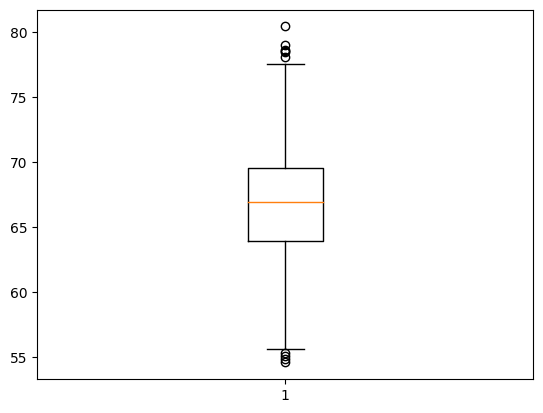

In [36]:
fig,ax = plt.subplots()
ax.boxplot(df['Height'])